## 임대료 및 공실률 시각화 - 서울대입구

1. 데이터 전처리
2. 서울대입구역 시각화
3. 상관계수 시각화
4. 원핫인코딩
5. 모델링


### 1. 데이터 전처리

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
pd.set_option('display.max_rows', None)

In [75]:
rent = pd.read_csv('rent.csv')

In [76]:
rent = rent[['기간','광역상권','하위상권','임대료','공실률','투자수익률','소득수익률','자본수익률']]

In [77]:
rent = rent[(rent['광역상권']!='서울평균') & (rent['광역상권']!='서울')]

In [78]:
rent = rent.drop([615, 651, 659, 695, 703, 739, 747, 769, 783, 791, 813, 827, 857, 871, 901, 915, 945, 959, 1005, 1051, 1097, 1143, 1199, 1255, 1311, 1367, 1430])

In [79]:
rent = rent.reset_index(drop=True)

In [80]:
rent['임대료'] = rent['임대료'].astype('float')
rent['공실률'] = rent['공실률'].astype('float')
rent['투자수익률'] = rent['투자수익률'].astype('float')
rent['소득수익률'] = rent['소득수익률'].astype('float')
rent['자본수익률'] = rent['자본수익률'].astype('float')
rent['자본수익률'] = rent['자본수익률'].astype('float')

In [81]:
rent

,기간,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률
0,2013.1/4,도심지역,소계,99.8,5.5,1.82,1.43,0.39
1,2013.1/4,도심지역,광화문,66.1,1.0,1.98,1.48,0.49
2,2013.1/4,도심지역,동대문,34.0,5.8,1.27,1.10,0.17
3,2013.1/4,도심지역,명동,249.9,7.1,2.02,1.61,0.41
4,2013.1/4,도심지역,서울역,59.9,5.4,2.13,1.48,0.66
5,2013.1/4,도심지역,종로,87.0,8.5,1.70,1.62,0.08
6,2013.1/4,도심지역,충무로,28.6,9.1,1.73,1.00,0.73
7,2013.1/4,강남지역,소계,75.1,7.2,1.56,1.02,0.54
8,2013.1/4,강남지역,강남대로,128.6,4.3,1.35,1.10,0.25
9,2013.1/4,강남지역,도산대로,43.8,5.7,1.53,0.78,0.75


In [82]:
rent.to_csv('rent2.csv')

In [83]:
rent.describe()

,임대료,공실률,투자수익률,소득수익률,자본수익률
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,57.297765,7.496229,1.645244,0.942151,0.703017
std,39.534552,4.339744,0.393665,0.250263,0.425001
min,20.900000,0.200000,0.020000,0.280000,-1.230000
25%,38.300000,4.500000,1.420000,0.760000,0.430000
50%,46.700000,6.900000,1.630000,0.930000,0.670000
75%,64.750000,9.700000,1.870000,1.110000,0.950000
max,296.700000,38.400000,3.210000,1.720000,2.650000


In [84]:
year = []
for i in rent['기간']:
    year.append(i.split('.')[0])
rent['연도']=year

quarter = []
for i in rent['기간']:
    quarter.append(i.split('.')[1])
rent['분기']=quarter

In [85]:
qaurter = []
for i in rent['분기']:
    qaurter.append(i.split('/')[0])
rent['분기'] = qaurter

In [86]:
rent = rent.drop('기간', axis=1)

In [87]:
rent['연도'] = rent['연도'].astype('int')
rent['분기'] = rent['분기'].astype('int')

In [88]:
rent

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
0,도심지역,소계,99.8,5.5,1.82,1.43,0.39,2013,1
1,도심지역,광화문,66.1,1.0,1.98,1.48,0.49,2013,1
2,도심지역,동대문,34.0,5.8,1.27,1.10,0.17,2013,1
3,도심지역,명동,249.9,7.1,2.02,1.61,0.41,2013,1
4,도심지역,서울역,59.9,5.4,2.13,1.48,0.66,2013,1
5,도심지역,종로,87.0,8.5,1.70,1.62,0.08,2013,1
6,도심지역,충무로,28.6,9.1,1.73,1.00,0.73,2013,1
7,강남지역,소계,75.1,7.2,1.56,1.02,0.54,2013,1
8,강남지역,강남대로,128.6,4.3,1.35,1.10,0.25,2013,1
9,강남지역,도산대로,43.8,5.7,1.53,0.78,0.75,2013,1


### 2. 서울대입구역  시각화

In [53]:
seouluv = rent[rent['하위상권']=='서울대입구역']

In [54]:
seouluv.shape

(13, 9)

In [55]:
seouluv

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
619,기타,서울대입구역,62.3,2.8,1.45,1.17,0.28,2017,1
660,기타,서울대입구역,62.8,1.7,1.40,1.18,0.22,2017,2
701,기타,서울대입구역,62.8,1.7,1.56,1.17,0.39,2017,3
948,기타지역,서울대입구역,74.1,3.3,1.88,1.11,0.76,2019,1
992,기타지역,서울대입구역,74.2,4.1,2.04,1.10,0.94,2019,2
1036,기타지역,서울대입구역,74.1,3.8,1.93,0.85,1.08,2019,3
1080,기타지역,서울대입구역,74.5,3.8,2.07,1.08,0.99,2019,4
1132,기타지역,서울대입구역,80.2,4.0,1.59,1.06,0.53,2020,1
1186,기타지역,서울대입구역,80.2,4.0,1.70,1.05,0.65,2020,2
1240,기타지역,서울대입구역,80.2,4.7,1.64,0.82,0.82,2020,3


In [56]:
#그래프에서 마이너스 부호 보여주기 위한 글꼴 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

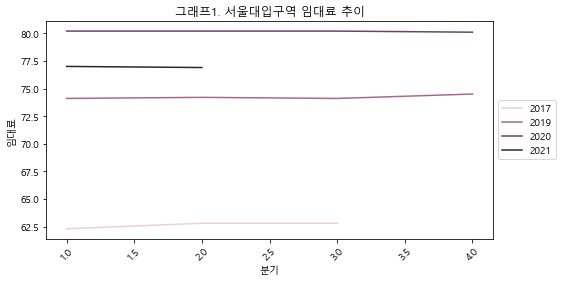

In [57]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=seouluv)
plt.xticks(rotation=45)
plt.title('그래프1. 서울대입구역 임대료 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#서울대입구역 임대료 결측치가 있다. 2017년 4분기, 2018년 데이터가 없다.
#2017, 2019, 2020년까지는 계속 오르다가 2021년에 약간 내려갔다.

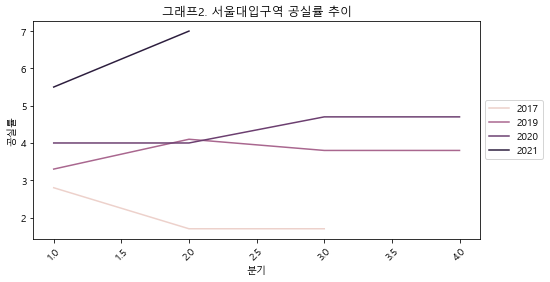

In [58]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='공실률',hue='연도', data=seouluv)
plt.xticks(rotation=45)
plt.title('그래프2. 서울대입구역 공실률 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#시간 흐름에 따라 증가하는 추세이다.
#하지만 다른 지역과 비교하면 여전히 낮은 수치이다.

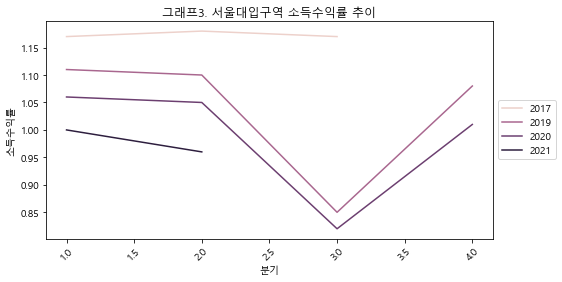

In [59]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='소득수익률',hue='연도', data=seouluv)
plt.xticks(rotation=45)
plt.title('그래프3. 서울대입구역 소득수익률 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#2019년과 2020년 3분기에 갑자기 훅 꺼지는 모습 --> 이유는 모르겠다.

#### 서울대 입구만 뽑아서 모델 만드는 건 어렵겠다. 전체 데이터를 활용해야겠다.

### 3. 전체 데이터 상관계수 시각화

<AxesSubplot:title={'center':'상관계수'}>

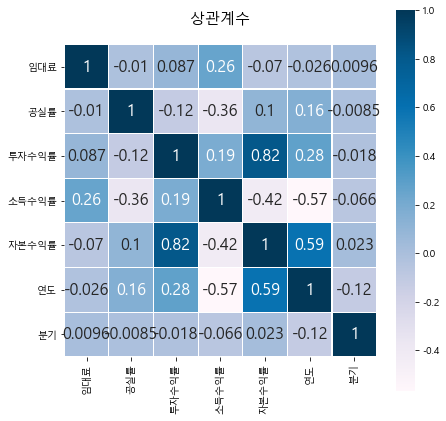

In [60]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(7,7)) 
plt.title("상관계수", y = 1.05, size = 15) 
sns.heatmap(rent.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


- (공실률, 투자수익률, 소득수익률, 자본수익률)는 임대료와 상관관계가 없다.
- 일단 하위상권 원핫인코딩을 해보자

### 4. 하위상권 원핫인코딩

In [93]:
#하위상권 값 확인
rent['하위상권'].unique()

array(['소계', '광화문', '동대문', '명동', '서울역', '종로', '충무로', '강남대로', '도산대로', '서초',
       '신사', '압구정동', '청담', '테헤란로', '공덕역', '신촌', '홍대합정', '건대입구', '경희대',
       '군자', '목동', '사당', '성신여대', '수유', '신림', '영등포', '용산', '이태원', '잠실',
       '장안동', '천호', '청량리', '혜화동', '화곡', '논현역', '신사역', '압구정', '불광역',
       '서울대입구역', '신림역', '오류동역', '왕십리', '남대문', '시청', '을지로', '교대역', '남부터미널',
       '당산역', '망원역', '영등포역', '가락시장', '구로디지털공단역', '노량진', '뚝섬', '상계역',
       '숙명여대', '용산역', '잠실새내역', '잠실송파', '서래마을', '양재말죽거리', '양재역', '동교연남',
       '신촌이대', '경희대학교', '구로디지털단지역', '독산시흥', '미아사거리', '성신여자대학교', '숙명여자대학교',
       '연신내'], dtype=object)

In [94]:
pd.get_dummies(rent['하위상권'])

,가락시장,강남대로,건대입구,경희대,경희대학교,공덕역,광화문,교대역,구로디지털공단역,구로디지털단지역,...,장안동,종로,천호,청담,청량리,충무로,테헤란로,혜화동,홍대합정,화곡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#get_dummies를 df로 저장하고
dummies = pd.get_dummies(rent['하위상권'])

In [62]:
rent_df = rent[['임대료','공실률','투자수익률','소득수익률','자본수익률','연도','분기']]

In [63]:
#기존의 df와 합치기
rent_dummies = pd.concat([rent_df, dummies], axis=1)

In [64]:
#모델 학습에 쓸 데이터셋 완성
rent_dummies

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,가락시장,강남대로,건대입구,...,장안동,종로,천호,청담,청량리,충무로,테헤란로,혜화동,홍대합정,화곡
0,99.8,5.5,1.82,1.43,0.39,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66.1,1.0,1.98,1.48,0.49,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34.0,5.8,1.27,1.10,0.17,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,249.9,7.1,2.02,1.61,0.41,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59.9,5.4,2.13,1.48,0.66,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,87.0,8.5,1.70,1.62,0.08,2013,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,28.6,9.1,1.73,1.00,0.73,2013,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,75.1,7.2,1.56,1.02,0.54,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,128.6,4.3,1.35,1.10,0.25,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,43.8,5.7,1.53,0.78,0.75,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#타겟값(임대료)를 float에서 int로 변환
rent_dummies['임대료'] = np.round(rent_dummies['임대료']).astype('int')

### 5. 모델링
(1) 결정트리, 랜덤 포레스트, 로지스틱 회귀      
(2) 로지스틱 회귀와 KNN과 VotingClassifier 이용해서 보팅 방식으로 결합하고 성능 비교     
(3) 랜덤포레스트 GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝       
(4) GBM(Gradient Boosting Machine)     
(5) XGBoost     

#### (1) 결정트리, 랜덤 포레스트, 로지스틱 회귀

In [66]:
#임대료를 제외한 df와 임대료만 있는 df로 나누기
rent_data = rent_dummies.loc[:,'공실률':]
rent_label = rent_dummies['임대료']

In [67]:
#학습과 테스트 셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rent_data, rent_label,
                                                   test_size=0.2, random_state=11)

In [68]:
# 3개의 ML 알고리즘 사용해서 학습/예측/평가 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 classifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, df_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))

#결과
#결과가 나오긴 했지만, 과정이 맞는건지 모르겠다.
#가장 높은 정확도는 랜덤포레스트였다. 0.6028
#로지스틱 회귀는 쓸 수 없을 정도로 낮다.

DecisionTreeClassifier 정확도:  0.5993
RandomForestClassifier 정확도:  0.6028
LogisticRegression 정확도:  0.0627


In [95]:
# cross_val_score 사용해서 결정트리 교차 검증 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_clf, rent_data, rent_label, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.4774
교차 검증 1 정확도: 0.5296
교차 검증 2 정확도: 0.5594
교차 검증 3 정확도: 0.4476
교차 검증 4 정확도: 0.2902
평균 정확도 0.4608


#### (2) 개별 모델 로지스틱 회귀와 KNN과 VotingClassifier 이용해서 보팅 방식으로 결합하고 성능 비교
- 보팅: 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

In [69]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [70]:
#개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
#estimators 복수: 리스트 형태
#lr_clf 이름을 LR로
#knn_clf는 이름을 KNN
#보팅 방식: 디폴트는 hard인데 soft로 설정
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting='soft')

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#로지스틱 회귀와 KNN 각 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    
#결과
#LogisticRegression 정확도가 0.0627에서 0.3659로 증가함

Voting 분류기 정확도: 0.4077
LogisticRegression 정확도: 0.3659
KNeighborsClassifier 정확도: 0.2787


#### (3) 랜덤포레스트 GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝

In [97]:
from sklearn.model_selection import GridSearchCV

# 테스트 해 볼 데이터를 많이 넣으면 기하급수적으로 늘어남
params = {
    'n_estimators' : [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 10, 20] 
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# n_jobs=-1 : 전체 CPU 콜을 다 활용하라는 것임
# 개인 PC가 굉장히 많은 수행 성능을 차지하니까 느려짐
# 길게 걸릴 수 있음

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
# cv=2 : 너무 많게 설정하면 실행 시간이 오래 거림 (총 72번 수행 : 36 x 2)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최적 예측 정확도 :\n', grid_cv.best_score_)

최적 하이퍼 파라미터 :
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최적 예측 정확도 :
 0.20173238628736012


In [98]:
#튜닝된 하이퍼 파라미터로 재학습 및 예측/평가
#GridSearchCV로 찾은 최적의 하이퍼 파라미터를
#랜덤 포레스트에 적용해서 예측 수행

#n_estimators=300으로 늘림
#위 결과의 최적 하이퍼 파라미터를 다 입력해서
#RandomForestClassifier 초기화시키고 예측 성능 측정
rf_clf = RandomForestClassifier(n_estimators =300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0, n_jobs=-1)

rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)

print('최적 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#결과
#랜덤포레스트 맨 처음 정확도는 0.6028 이었는데 오히려 떨어짐

최적 예측 정확도: 0.3275


랜덤포레스트 주요 20개 피처 추출

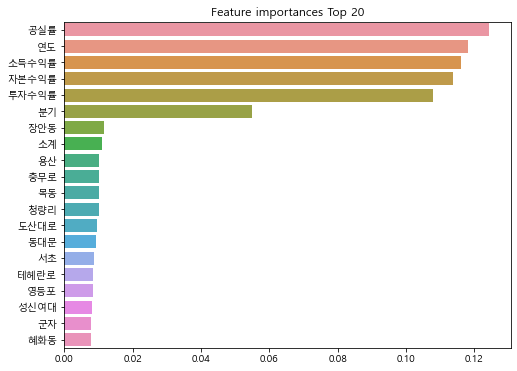

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#결과
#공실률~분기까지는 중요도가 나름 있음

#### (4) GBM(Gradient Boosting Machine)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

#GBM 수행시간 측정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행시간:{0:.1f}'.format(time.time()-start_time))

#결과
#맨 처음 RandomForestClassifier 정확도가 0.6028였는데, GBM으로 약간 상승했다.
#일반적으로 GBM이 랜덤포레스트보다 예측 성능이 조금 뛰어나다고 함. 확인.

GBM 정확도:0.6202
GBM 수행시간:32.1


#### (5) XGBoost

In [110]:
import xgboost as xgb

In [117]:
#파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 함
#변환된 학습용, 테스트용 데이터 세트 생성
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [118]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'eval_metric':'logloss'
}

num_rounds = 400

In [119]:
#지정한 파라미터로 모델 학습
#train 데이터 셋은 'train', evaluation 데이터 셋은 'eval'로 표기
wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)

#결과
#train() 사용해서 학습 수행
#99번 반복까지만 수행한 후, 학습 종료
#로그 손실은 양수여야 하는데 무려 -2000이 나왔다.. 허허
#코드를 복붙해서 쓰다보니 잘못된 코드가 있을 것이다.

[0]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[1]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[2]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[3]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[4]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[5]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[6]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[7]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[8]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[9]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[10]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[11]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[12]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[13]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[14]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[15]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[16]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[17]	train-logloss:-2056.97070	eval-logloss:-2144.37280
[1

In [120]:
#예측 수행: 예측 확률값 반환
pred_probas = xgb_model.predict(dtest)

#예측 확률이 0.5보다 크면 1, 아니면 0으로 저장
preds = [1 if x>0.5 else 0 for x in pred_probas]

In [121]:
#XGBoost 모델의 예측 성능 평가

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [122]:
#테스트: 실제 레이블 값을 가지는 y_test
#예측 레이블인 preds 값으로 XGBoost 모델 예측 성능 평가
get_clf_eval(y_test, preds, pred_probas)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

XGB의 주요 피처 시각화
- xgboost 패키지에 내장된 시각화 기능 수행
- plot_importance() API: 피처의 중요도를 막대그래프 형식으로 나타냄

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

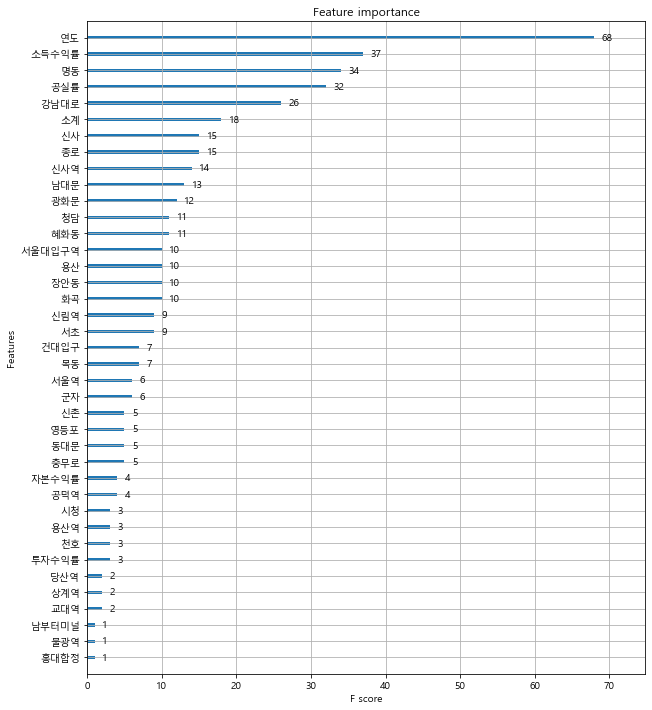

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
xgb.plot_importance(xgb_model, ax=ax)

#결과
#랜덤포레스트 주요 20개 피처에서 보지 못했던 피처들이 나왔음
#명동, 강남대로가 눈에 띔

## 추후 방향
- 모델링 자체가 안될 것이라고 생각했는데, 되긴 되었다.
- 그런데 성능이 너무 좋지 않기 때문에 성능 향상을 목표로 해야겠다.
